## Complete Case Analysis (CCA)
1. Deletion of rows if values missing in col

### Assumption
1. Data is missing completely at Random
2. Not Like All values bunch Together 

### Disadvantage
1. You might discard large fraction of usefull data
2. Excluded values might be informative if data not missing random

## When to Use
1. Data missing randomly :: if >5% missing in col don't use CCA
2. If too much Data missing in col remove col > 80%

In [8]:
import pandas as pd
df = pd.read_csv('data_science_job.csv')
df.isnull().mean()*100 ## Missing Percentage
# Cant be applied on gender

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [9]:
cols = [i for  i in df.columns if 0< df[i].isnull().mean()*100 < 5 ]
df[cols].head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0


#### Percentage data remain

In [11]:
len(df[cols].dropna())/len(df) * 100 

89.68577095730244

In [30]:
df_new = df[cols].dropna()

0           no_enrollment
1           no_enrollment
2        Full time course
3                     NaN
4           no_enrollment
               ...       
19153       no_enrollment
19154       no_enrollment
19155       no_enrollment
19156       no_enrollment
19157       no_enrollment
Name: enrolled_university, Length: 19158, dtype: object

## Verify
1. For numerical CCA check hist before and after if comparable then good to go

(array([9.29348380e-02, 0.00000000e+00, 0.00000000e+00, 1.10360120e-01,
        7.55095559e-02, 0.00000000e+00, 1.27785402e-01, 4.82099472e-01,
        0.00000000e+00, 0.00000000e+00, 2.03875801e+00, 5.22758464e-02,
        0.00000000e+00, 6.56352294e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.37601645e+01, 0.00000000e+00, 2.49762377e-01,
        1.74252821e-02, 5.86651165e-01, 0.00000000e+00, 6.67969148e-01,
        4.03685703e+00, 4.64674190e-02, 0.00000000e+00, 5.16950037e-01,
        4.82099472e-01, 1.25462031e+00, 1.47534055e+00, 1.82965462e+00,
        6.15693302e-01, 8.13179833e-02, 1.02228322e+00, 2.48019849e+00,
        0.00000000e+00, 7.26053422e-01, 8.13179833e-01, 1.09198435e+00,
        2.42792264e+00, 6.85394431e-01, 7.72520841e-01, 2.88678841e+00,
        5.68064198e+00, 1.41144785e+00, 9.64779787e+00, 3.78941802e+01,
        0.00000000e+00, 3.00295695e+00]),
 array([0.448  , 0.45802, 0.46804, 0.47806, 0.48808, 0.4981 , 0.50812,
        0.51814, 0.5281

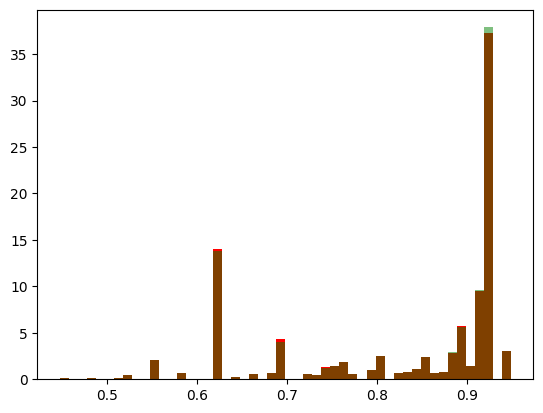

In [38]:
import matplotlib.pyplot as plt

plt.hist(df[cols[0]] ,color = 'red',density = True,bins=50)
plt.hist(df_new[cols[0]], color = 'green',alpha = 0.5,density = True,bins=50)